In [1]:
# Dimensionality Reduction
# PCA
#SCREE PLOT
# one eigenvalue criterion
#Factor Analysis

In [2]:
# PCA  Principle component

# unsupervised algorithm
# rather than attempting to predict the y values from the x values, the unsupervised learning problem attempts to 
# learn about the relationship between the x and y values.

#These vectors represent the principal axes of the data, and 
#the length of the vector is an indication of how "important" 
#that axis is in describing the distribution of the data—more precisely, 
#it is a measure of the variance of the data when projected onto that axis. The projection of 
#each data point onto the principal axes are the "principal components" of the data.



# This transformation from data axes to principal axes is an affine transformation, which basically means it is 
# composed of a translation, rotation, and uniform scaling.

# Using PCA for dimensionality reduction involves zeroing out one or more of the smallest
# principal components, resulting in a lower-dimensional 
# projection of the data that preserves the maximal data variance.



In [3]:
#Both Linear Discriminant Analysis (LDA) and PCA are linear transformation methods. 
#PCA yields the directions (principal components) that maximize the variance of the data,
#whereas LDA also aims to find the directions that maximize the separation (or discrimination) between different classes, 
#which can be useful in pattern classification problem (PCA "ignores" class labels).
#In other words, PCA projects the entire dataset onto a different feature (sub)space, and 
#LDA tries to determine a suitable feature (sub)space in order to distinguish between patterns that belong to different classes.

In [4]:
import pandas as pd
# CSV File - Read
df = pd.read_csv('C:\\Users\\radha\\Desktop\\dsp27 Class\\diabetes.csv')
#  ,header=None ,skiprows=1 , names=['Cal', 'Pr', 'Fat', 'sod', 'Fib', 'Rting']
print(df.head(5)) 
print(df.shape)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)


In [5]:
import numpy as np
diabetes_data_copy = df.copy(deep = True)
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [6]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(), inplace = True)

In [7]:
diabetes_data_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [8]:
# split data table into data X and class labels y
X = df.iloc[:,0:8].values
y = df.iloc[:,-1].values

In [9]:
#from sklearn.preprocessing import StandardScaler
#X_std = StandardScaler().fit_transform(X)

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=8)  # 8 components and check with 2
Y_sklearn = sklearn_pca.fit_transform(X)

In [11]:
sklearn_pca.explained_variance_ratio_

array([8.88546635e-01, 6.15907837e-02, 2.57901189e-02, 1.30861374e-02,
       7.44093864e-03, 3.02614919e-03, 5.12444875e-04, 6.79264301e-06])

In [12]:
print(abs(sklearn_pca.components_ ))

[[2.02176587e-03 9.78115765e-02 1.60930503e-02 6.07566861e-02
  9.93110844e-01 1.40108085e-02 5.37167919e-04 3.56474430e-03]
 [2.26488861e-02 9.72210040e-01 1.41909330e-01 5.78614699e-02
  9.46266913e-02 4.69729766e-02 8.16804621e-04 1.40168181e-01]
 [2.24649003e-02 1.43428710e-01 9.22467192e-01 3.07013055e-01
  2.09773019e-02 1.32444542e-01 6.39983017e-04 1.25454310e-01]
 [4.90459604e-02 1.19830016e-01 2.62742788e-01 8.84369380e-01
  6.55503615e-02 1.92801728e-01 2.69908637e-03 3.01024330e-01]
 [1.51612874e-01 8.79407680e-02 2.32165009e-01 2.59973487e-01
  1.72312241e-04 2.14744823e-02 1.64080684e-03 9.20504903e-01]
 [5.04730888e-03 5.07391813e-02 7.56365525e-02 2.21363068e-01
  6.13326472e-03 9.70776708e-01 2.02903702e-03 1.51133239e-02]
 [9.86672995e-01 8.83426114e-04 1.22975947e-03 3.76444746e-04
  1.42307394e-03 2.73046214e-03 6.34402965e-03 1.62555343e-01]
 [6.10123250e-03 8.25459539e-04 5.20865450e-04 2.54871909e-03
  2.68965921e-04 2.67341863e-03 9.99972146e-01 1.95271966e-03]]

In [13]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#y= labelencoder.fit_transform(y)
#y

# Not required for this data !!

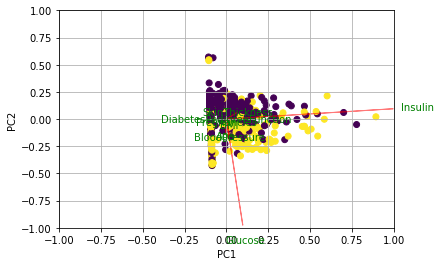

In [14]:
## biplot
import numpy as np
import matplotlib.pyplot as plt
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(Y_sklearn[:,0:2],np.transpose(sklearn_pca.components_[0:2, :]), labels=['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction'  ,   'Age'    ])                 
                                                           

plt.show()

In [15]:
# abobe Glucose,Insulin may be good
df2 = df.iloc[:,0:8]
df2.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

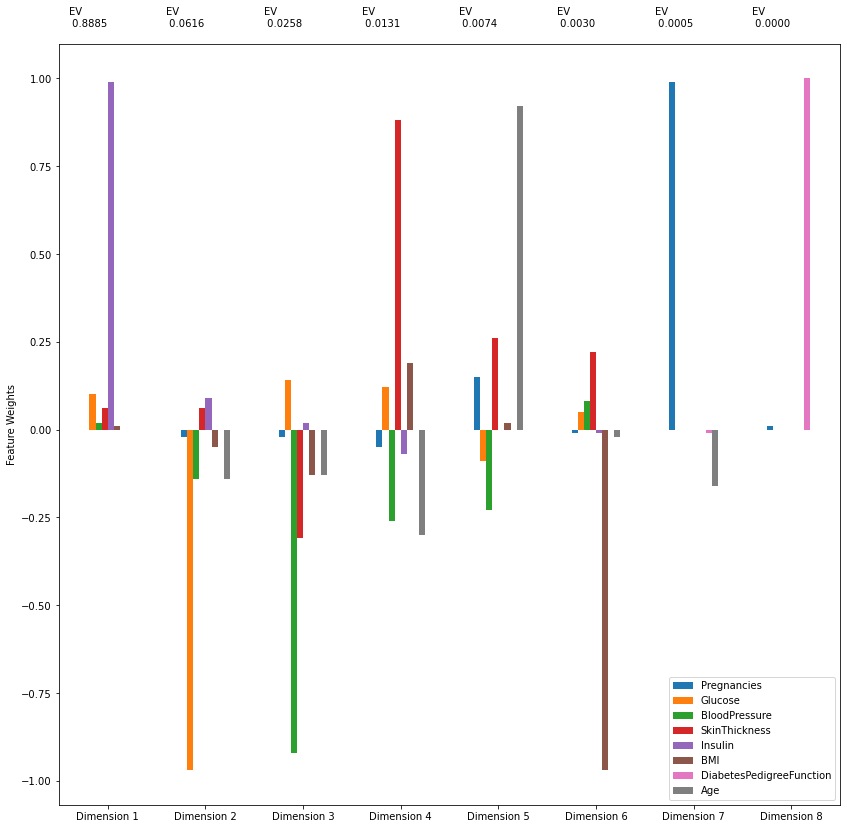

In [16]:
def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 2), columns = data.keys()) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 2), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

   
    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,14))
    

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    # Explained Variance = EV
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "EV\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

#
pca_results = pca_results(df2 ,sklearn_pca)

# PC1 : Glucose, Insulin : 0.88

# enumerate

In [17]:
#################################################

In [18]:
print(sklearn_pca)

PCA(n_components=8)


In [19]:
# Here, pca.components_ has shape [n_components, n_features]. 
#Thus, by looking at the PC1 (First Principal Component) which is the first row: [0.52237162 0.26335492 0.58125401 0.56561105]] we can conclude 
# that feature 1, 3 and 4 (or Var 1, 3 and 4 in the biplot) are the most important

In [20]:
sklearn_pca.explained_variance_ratio_

array([8.88546635e-01, 6.15907837e-02, 2.57901189e-02, 1.30861374e-02,
       7.44093864e-03, 3.02614919e-03, 5.12444875e-04, 6.79264301e-06])

In [21]:
np.set_printoptions(suppress=True)
print(abs(sklearn_pca.components_ ))
#  you can get the eigenvectors using clf.components_.

# hiding e-03 like
# order : 5 variable
# order 2 variable

[[0.00202177 0.09781158 0.01609305 0.06075669 0.99311084 0.01401081
  0.00053717 0.00356474]
 [0.02264889 0.97221004 0.14190933 0.05786147 0.09462669 0.04697298
  0.0008168  0.14016818]
 [0.0224649  0.14342871 0.92246719 0.30701306 0.0209773  0.13244454
  0.00063998 0.12545431]
 [0.04904596 0.11983002 0.26274279 0.88436938 0.06555036 0.19280173
  0.00269909 0.30102433]
 [0.15161287 0.08794077 0.23216501 0.25997349 0.00017231 0.02147448
  0.00164081 0.9205049 ]
 [0.00504731 0.05073918 0.07563655 0.22136307 0.00613326 0.97077671
  0.00202904 0.01511332]
 [0.98667299 0.00088343 0.00122976 0.00037644 0.00142307 0.00273046
  0.00634403 0.16255534]
 [0.00610123 0.00082546 0.00052087 0.00254872 0.00026897 0.00267342
  0.99997215 0.00195272]]


In [22]:
pca_results.cumsum()

,Explained Variance,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Dimension 1,0.89,-0.00,0.10,0.02,0.06,0.99,0.01,0.00,-0.00
Dimension 2,0.95,-0.02,-0.87,-0.12,0.12,1.08,-0.04,0.00,-0.14
Dimension 3,0.98,-0.04,-0.73,-1.04,-0.19,1.10,-0.17,0.00,-0.27
Dimension 4,0.99,-0.09,-0.61,-1.30,0.69,1.03,0.02,0.00,-0.57
Dimension 5,1.00,0.06,-0.70,-1.53,0.95,1.03,0.04,0.00,0.35
Dimension 6,1.00,0.05,-0.65,-1.45,1.17,1.02,-0.93,0.00,0.33
Dimension 7,1.00,1.04,-0.65,-1.45,1.17,1.02,-0.93,-0.01,0.17
Dimension 8,1.00,1.05,-0.65,-1.45,1.17,1.02,-0.93,0.99,0.17


In [112]:
sklearn_pca.fit(X)
variance = sklearn_pca.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(sklearn_pca.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features : till above 75%

array([100., 100., 100., 100., 100., 100., 100., 100., 100.])

In [23]:
##############################

In [24]:
# The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the "core" of a PCA: 
#    The eigenvectors (principal components) determine the directions of the new feature space, and 
#    the eigenvalues determine their magnitude. 
#    In other words, the eigenvalues explain the variance of the data along the new feature axes.

In [26]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[13456.57298102    -0.             0.            -0.
     -0.            -0.            -0.            -0.        ]
 [   -0.           932.76013231     0.            -0.
     -0.            -0.            -0.            -0.        ]
 [    0.             0.           390.57783115    -0.
      0.             0.            -0.            -0.        ]
 [   -0.            -0.            -0.           198.18269105
     -0.             0.            -0.             0.        ]
 [   -0.            -0.             0.            -0.
    112.68911496    -0.             0.             0.        ]
 [   -0.            -0.             0.             0.
     -0.            45.82944307     0.            -0.        ]
 [   -0.            -0.            -0.            -0.
      0.             0.             7.76070899     0.        ]
 [   -0.            -0.            -0.             0.
      0.            -0.             0.             0.10287102]]


In [27]:
# we perform an eigendecomposition on the covariance matrix:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 1.  0. -0. -0.  0. -0.  0.  0.]
 [ 0.  1. -0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0. -0.  0. -0. -0.]
 [ 0. -0. -0. -1. -0.  0. -0. -0.]
 [ 0. -0.  0.  0.  1. -0. -0. -0.]
 [ 0. -0. -0.  0. -0. -1. -0.  0.]
 [ 0. -0.  0. -0. -0.  0.  1. -0.]
 [ 0.  0. -0.  0. -0.  0.  0.  1.]]

Eigenvalues 
[13456.57298102   932.76013231   390.57783115   198.18269105
   112.68911496    45.82944307     7.76070899     0.10287102]


In [28]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

cum_var_exp

array([ 88.85466346,  95.01374183,  97.59275372,  98.90136747,
        99.64546133,  99.94807625,  99.99932074, 100.        ])

In [29]:
# How to know, what contributing PCA1 ??
# Feature importance using PCA

#The plot above clearly shows that most of the variance (72.77% of the variance to be precise)
#can be explained by the first principal component alone. 
#The second principal component still bears some information (23.03%) while the third and
#fourth principal components can safely be dropped without losing to much information. 
#Together, the first two principal components contain 95.8% of the information.

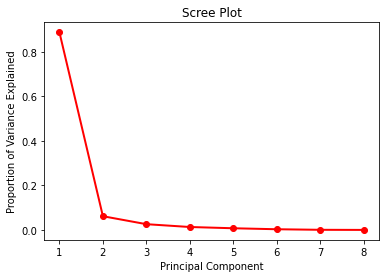

In [30]:
# scree plot - Like Elbow
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#pca = sklearnPCA(n_components=2)
PC_values = np.arange(sklearn_pca.n_components_) + 1

# explained_variance_ratio = EVR
plt.plot(PC_values, sklearn_pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [42]:
# Factor Loadings
# eigen vecror for above is 0.8

In [38]:
loadings = pd.DataFrame(sklearn_pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7','PC8'], 
                        index=df2.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Pregnancies,-0.002022,-0.022649,-0.022465,-0.049046,0.151613,-0.005047,0.986673,0.006101
Glucose,0.097812,-0.972210,0.143429,0.119830,-0.087941,0.050739,0.000883,-0.000825
BloodPressure,0.016093,-0.141909,-0.922467,-0.262743,-0.232165,0.075637,-0.001230,0.000521
SkinThickness,0.060757,0.057861,-0.307013,0.884369,0.259973,0.221363,-0.000376,-0.002549
Insulin,0.993111,0.094627,0.020977,-0.065550,-0.000172,-0.006133,0.001423,-0.000269
BMI,0.014011,-0.046973,-0.132445,0.192802,0.021474,-0.970777,-0.002730,-0.002673
DiabetesPedigreeFunction,0.000537,-0.000817,-0.000640,0.002699,0.001641,-0.002029,-0.006344,0.999972
Age,-0.003565,-0.140168,-0.125454,-0.301024,0.920505,-0.015113,-0.162555,-0.001953


In [39]:
# one eigenvalue criterion
# https://www.datasklr.com/principal-component-analysis-and-factor-analysis/principal-component-analysis

In [40]:

#  1. One criterion is the choose components that have eigenvalues greater than 1

#Choosing the number of components to extract
#Since the goal of running a PCA is to reduce our set of variables down, 
#it would useful to have a criterion for selecting the optimal number of components that are of course 
#smaller than the total number of items. One criterion is the choose components that have eigenvalues greater than 1.
#Under the Total Variance Explained table, we see the first two components have an eigenvalue greater than 1. 
#This can be confirmed by the Scree Plot which plots the eigenvalue (total variance explained) by the component number. 

In [43]:
# https://stats.idre.ucla.edu/spss/seminars/efa-spss/

# https://bradleyboehmke.github.io/HOML/pca.html

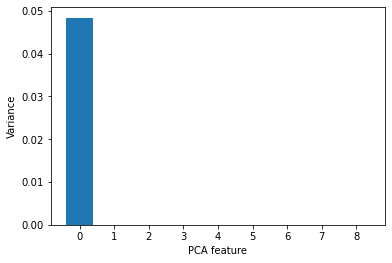

In [109]:
# Plot the explained variances
features = range(sklearn_pca.n_components_)
plt.bar(features, sklearn_pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.show()